# The Battle of Neighborhoods: Boston, Massachusetts

Boston, Massachusetts is one of the most widely known cities in the United States. The city proper covers 127 km2 and, as of 2018, the estimated population is 694,583 (see [US Census Bureau](https://www.census.gov/quickfacts/fact/table/bostoncitymassachusetts/PST045218 "US Census Bureau")). It's not a very big city, which may even give an additional value to it: a tourist can explore city's many sides in a relatively short amount of time, and it could potentially be a very livable place.

### 1. Allston

There is a river (Charles River) and a bicycle path on the north and east, offering plenty of recreational opportunities.

diverse community, including longtime residents, students from nearby Boston University and Harvard, recent immigrants, and young professionals Supports business owners and nonprofits in the area. Harvard University, which owns more land in Boston than in Cambridge, is a major tenant of the neighborhood. Business school and athletic facilities. 64.55% of Allston’s population is between the ages of 20-34 making Allston the neighborhood with the highest percentage of young adults. 358 acres of land dedicated to academic space, the most in Boston.

### 2. Back Bay

protected historic district Today Back Bay is known for its elegant architecture and bustling commercial streets feature concerts and festivals the finish line of the Boston Marathon is here international retailers, salons, boutique offices, and restaurants business high-end hotels, restaurants, and office buildings 89.5% of Back Bay’s population has a bachelor’s degree or higher The median age in Back Bay is 31.9

### 3. Bay Village 

One of the smallest neighborhoods in Boston shops and restaurants Bay Village's narrow streets, historic facades, brick sidewalks, and gas street lamps create an appealing and quiet pedestrian environment in a primarily residential neighborhood. Residents enjoy easy walking access to the surrounding parks, shops, restaurants, and theaters of Downtown, Back Bay, and the South End.

### 4. Beacon Hill

protected historic neighborhood likely Boston's best known neighborhood Maasachussets State House Classic red brick houses from the early nineteeth century Eclectic boutiques, antique stores, and restaurants serve the neighborhood and Beacon Hill's frequent tourists. The Beacon Hill Business Association supports business owners and nonprofits in the area. 89.5% of Beacon Hill’s population has a bachelor’s degree or higher. The median age in Beacon Hill is 31.3.

### 5. Brighton

peaceful neighborhood is a great place for young families and professionals residential and commercial Families, who have called Brighton home for generations, share the neighborhood with recent immigrants, students from nearby colleges, and young professionals This diversity of population attracts a diversity of businesses, nonprofits, medical and educational institutions to the area. ethnic grocery stores to cozy neighborhood pubs. Major tenants of the neighborhood include St. Elizabeth's Medical Center, Boston College, WGBH, and the New Balance Athletic Shoe's world headquarters

### 6. Charlestown

neighborhood’s Irish roots The neighborhood has historical roots, but it has turned into a busy, modern-day neighborhood. city's oldest neighborhood public housing waterfront condominiums and apartments contemporary restaurants and shops thrive alongside the oldest tavern in Massachusetts (Warren Tavern) two marinas Bunker Hill Community College, Spauling Rehabilitation Hospital, and a branch of Massachusetts General Hospital

### 7. Chinatown-Leather District

Chinese quarter water features and bamboo, Chinatown Park South Station serves as a major rail and bus hub for Boston The number of housing units in Chinatown grew 54.5% from 2000 to 2010. 49.2% of households in Chinatown are families

### 8. Dorchester

The biggest and most diverse neighborhood in the City Long-time residents mingle together with new immigrants from Vietnam, Cape Verde, Ireland, and many other countries. This wonderful mix of residents from all cultures and backgrounds makes it an incredibly vibrant place to live, work, and spend time. Former residents can often be seen and heard claiming to be “OFD” — Originally From Dorchester. waterfront, residential neighborhoods, commercial corridors, and a university campus numerous parks University of Massachussets Boston

### 9. Downtown

Home to City Hall, numerous corporate headquarters, condos and apartments, and some of Boston’s most beloved tourist attractions in the heart of Boston Housing options in downtown are varied, ranging from historic apartment buildings to modern glass towers. Over 200,000 people work downtown every day major retail area, offering a range of apparel stores, national retailers, bakeries, and both fast casual and fine restaurants to suit every taste Historic theaters, including the Opera House hotels Suffolk University, Emerson College, and Urban College

### 10.East Boston

waterfront the neighborhood of immigrants many ethnic restaurants residential neighborhoods, transportation links, and recreational opportunities East Boston is currently home to a blend of longtime residents, young professionals, and predominantly Colombian and Salvadoran immigrants Logan International Airport Almost 50% of East Boston’s population is foreign born, the highest percentage of all Boston’s neighborhoods. Over half of East Boston’s foreign born population is from Colombia or El Salvador. family oriented: Almost 60% of East Boston’s households are families

### 11. Fenway-Kenmore

Fenway Park and Red Sox Museum of Fine Arts and Symphony Hall clubs higher education institutions buzzing mix of families, young professionals, and students Berklee College of Music Huntington Avenue is celebrated as Boston’s “Avenue of the Arts”. music venues and nightlife numerous academic and medical institutions Almost 70% of Fenway’s population is enrolled in school. 44.2% of Fenway’s population works in the educational services, health care and social assistance industry.

### 12. Hyde Park

suburban area Today, Hyde Park offers its residents a unique blend of accessible city amenities and quiet suburban lifestyle deiversed population significant open and green space A thriving industrial section of the neighborhood is home to numerous businesses.

### 13. Jamaica Plain

diverse suburb home to Latinos, young families, a growing gay community, and young professionals fishing, sailing, and running botanical garden 5% of Jamaica Plain’s population commutes to work by bicycle – the highest percentage of any Boston neighborhood. 25.3% of Jamaica Plain’s population is Hispanic.

### 14. Mattapan

home to diverse cultures and many immigrant-owned businesses At the dawn of 21st century, immigrants traveling in New England found Mattapan to be a "good place to sit." Irish, Jewish, and Haitian immigrants called the neighborhood home. Now, Mattapan is home to a large African American and Caribbean community. significant amount of green space Blue Hill Avenue and Mattapan Square are the neighborhood’s main commercial districts, home to banks, law offices, restaurants, retail shops, health centers, and places of worship 67.3% of households in Mattapan are families. Mattapan has the highest percentage of residents who speak French at home, at 18.4%.

### 15. Mid-Dorchester

The City is bringing lots of new development to the area, including housing and light industrial and commercial opportunities. With the improvement of the Fairmount/ Indigo Line, there's now easy access to jobs and the downtown financial area.

### 16. Mission Hill

largely residential neighborhood traditional architecture Mission Hill’s population grew 17% from 2000 to 2010. 53% of Mission Hill residents are non-white

### 17. North End

Italian-American community some of the City's best restaurants and old-world cafes one of the most visited parts of Boston Boston's oldest residential community Boston's "Little Italy" historical sites 80.9% of North End’s population has a bachelor’s degree or higher. The North End experienced a 5.1% population increase from 2000 to 2010.

### 18. Roslindale

garden suburb plenty natural beauty primarely residential community 13.2% of Roslindale’s population is enrolled in nursery, kindergarten, elementary, or middle school. 40.7% of Roslindale’s residents speak a language other than English at home.

### 19. Roxbury

historic neighborhood Today, Roxbury is the heart of Black culture in Boston geographic heart of Boston Hispanic, and Asian families, along with young professionals parks, substantial green space Roxbury Community College and the John D. O'Bryant School of Mathematics and Science Roxbury is home to over 570 acres of parks, playgrounds, and athletic fields, the most in the city. Roxbury has over 23% of park space in Boston. Roxbury’s population grew by 16.8% from 2000 to 2010.

### 20. South Boston

An urban neighborhood with a strong sense of history and tradition South Boston is home to both long-time residents and a new wave of young professionals who are drawn to the area’s open space, emerging nightlife, and easy access to downtown. The neighborhood boasts miles of beaches and waterfront parks Between 2000 and 2010, South Boston’s population with a bachelor’s degree or higher increased from 28.2% to 54.8%. South Boston’s Black or African American population grew by 47.9% from 2000 to 2010.

### 21. South End

The South End is truly a cosmopolitan neighborhood. It is just minutes away from Downtown and the Back Bay, and has recently become one of the City’s most popular neighborhoods. Victorian townhouses home to active young families, professionals, and immigrants, and is popular with Boston’s gay community United States' largest Victorian residential district Boston Center for the Arts Boston Medical Center and Boston University School of Medicine 44.7% of South End residents are non-white. 11.2% of South End’s population speaks Chinese at home

### 22. West End

home to prominent Boston institutions, including Massachusetts General Hospital and TD Garden up-and-coming neighborhood in Boston large apartment towers small neighborhood City of Cambridge - walking distance The Liberty Hotel and Clink Bar, both housed in a converted historic jail, are hip neighborhood institutions 93.4% of West End’s population has a bachelor’s degree or higher, the highest percentage of all Boston neighborhoods. 32.2% of West End’s population is foreign born.

### 23. West Roxbury 

civic activism and youth programs suburban vibe green spaces swimming hiking West Roxbury has the most open space in the city, with nearly 1,200 acres.

In [1]:
import numpy as np 
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

print('Everything works fine!')

Everything works fine!


In [2]:
res = requests.get(
    'https://www.boston.gov/neighborhoods')

soup = BeautifulSoup(res.text, 'html.parser')

boston_neighborhoods = []

for row in soup.find_all('div', class_='g p-b500')[0].find_all('h3'):
    boston_neighborhoods.append(row.text)
print(boston_neighborhoods)


['Allston', 'Back Bay', 'Bay Village', 'Beacon Hill', 'Brighton', 'Charlestown', 'Chinatown-Leather District', 'Dorchester', 'Downtown', 'East Boston', 'Fenway-Kenmore', 'Hyde Park', 'Jamaica Plain', 'Mattapan', 'Mid-Dorchester', 'Mission Hill', 'North End', 'Roslindale', 'Roxbury', 'South Boston', 'South End', 'West End', 'West Roxbury']


In [3]:
df = pd.DataFrame({'Boston Neighborhoods': boston_neighborhoods})
df

,Boston Neighborhoods
0,Allston
1,Back Bay
2,Bay Village
3,Beacon Hill
4,Brighton
5,Charlestown
6,Chinatown-Leather District
7,Dorchester
8,Downtown
9,East Boston


In [4]:
df.shape[0]

23

In [5]:
def find_latlng(neighborhood):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Boston, Massachusetts'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [6]:
lat_long = [find_latlng(neighborhood) for neighborhood in df['Boston Neighborhoods']]

In [7]:
lat_long[:10]

[[42.35046649714098, -71.11100415506229],
 [42.34999000000005, -71.08764999999994],
 [42.348168000000015, -71.06847074999999],
 [42.35842000000008, -71.06859999999995],
 [42.35213123053123, -71.12492353661709],
 [42.36776992509806, -71.05901694825978],
 [42.35251000000005, -71.06089999999995],
 [42.35134867454975, -71.05285041243937],
 [42.35829000000007, -71.05662999999998],
 [42.35141360528571, -71.05671282961363]]

In [8]:
df_coordinates = pd.DataFrame(lat_long, columns=('Latitude', 'Longitude'))
df_coordinates

,Latitude,Longitude
0,42.350466,-71.111004
1,42.349990,-71.087650
2,42.348168,-71.068471
3,42.358420,-71.068600
4,42.352131,-71.124924
5,42.367770,-71.059017
6,42.352510,-71.060900
7,42.351349,-71.052850
8,42.358290,-71.056630
9,42.351414,-71.056713


In [9]:
df = df.assign(Latitude=df_coordinates.Latitude.values, Longitude=df_coordinates.Longitude.values)
df

,Boston Neighborhoods,Latitude,Longitude
0,Allston,42.350466,-71.111004
1,Back Bay,42.349990,-71.087650
2,Bay Village,42.348168,-71.068471
3,Beacon Hill,42.358420,-71.068600
4,Brighton,42.352131,-71.124924
5,Charlestown,42.367770,-71.059017
6,Chinatown-Leather District,42.352510,-71.060900
7,Dorchester,42.351349,-71.052850
8,Downtown,42.358290,-71.056630
9,East Boston,42.351414,-71.056713


In [10]:
df['Zip Code'] = ['02134', '02116', '02116', '02108', '02135', '02129', '02111', '02121', '02201', '02128', '[02115, 02215]', '02136', '02130', '02126', '[02121, 02122, 02124, 02125]', '[02120, 02115]', '02113', '02131', '02119', '02127', '02118', '02114', '02132']

In [11]:
df['Zip Code']
df

,Boston Neighborhoods,Latitude,Longitude,Zip Code
0,Allston,42.350466,-71.111004,02134
1,Back Bay,42.349990,-71.087650,02116
2,Bay Village,42.348168,-71.068471,02116
3,Beacon Hill,42.358420,-71.068600,02108
4,Brighton,42.352131,-71.124924,02135
5,Charlestown,42.367770,-71.059017,02129
6,Chinatown-Leather District,42.352510,-71.060900,02111
7,Dorchester,42.351349,-71.052850,02121
8,Downtown,42.358290,-71.056630,02201
9,East Boston,42.351414,-71.056713,02128


In [12]:
df['Zip Code'] = df['Zip Code'].str.strip('[]')
df

,Boston Neighborhoods,Latitude,Longitude,Zip Code
0,Allston,42.350466,-71.111004,02134
1,Back Bay,42.349990,-71.087650,02116
2,Bay Village,42.348168,-71.068471,02116
3,Beacon Hill,42.358420,-71.068600,02108
4,Brighton,42.352131,-71.124924,02135
5,Charlestown,42.367770,-71.059017,02129
6,Chinatown-Leather District,42.352510,-71.060900,02111
7,Dorchester,42.351349,-71.052850,02121
8,Downtown,42.358290,-71.056630,02201
9,East Boston,42.351414,-71.056713,02128


In [13]:
df['BPD Districts'] = ['D-14', 'D-4', 'A-1', 'A-1', 'D-14', 'A-15', 'A-1', 'C-11', 'A-1', 'A-7', 'D-4', 'E-18', 'E-13', 'B-3', 'C-11', 'B-2', 'A-1', 'E-5', 'B-2', 'C-6', 'D-4', 'A-1', 'E-5']

In [14]:
df

,Boston Neighborhoods,Latitude,Longitude,Zip Code,BPD Districts
0,Allston,42.350466,-71.111004,02134,D-14
1,Back Bay,42.349990,-71.087650,02116,D-4
2,Bay Village,42.348168,-71.068471,02116,A-1
3,Beacon Hill,42.358420,-71.068600,02108,A-1
4,Brighton,42.352131,-71.124924,02135,D-14
5,Charlestown,42.367770,-71.059017,02129,A-15
6,Chinatown-Leather District,42.352510,-71.060900,02111,A-1
7,Dorchester,42.351349,-71.052850,02121,C-11
8,Downtown,42.358290,-71.056630,02201,A-1
9,East Boston,42.351414,-71.056713,02128,A-7


In [15]:
df_crime = pd.read_csv('tmpyeh05bxn.csv')
df_crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


In [16]:
df_crime = df_crime.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'Location'], axis=1)


In [17]:
df_crime.head(11)

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,STREET,Lat,Long
0,ASSAULT - AGGRAVATED,External,0,2019,RIVERVIEW DR,NaN,NaN
1,VERBAL DISPUTE,E13,0,2019,DAY ST,42.325122,-71.107779
2,INVESTIGATE PERSON,C11,0,2019,GIBSON ST,42.297555,-71.059709
3,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,0,2019,BROOKS ST,42.355120,-71.162678
4,SICK ASSIST,E13,0,2019,WASHINGTON ST,42.309718,-71.104294
5,VANDALISM,E18,0,2019,BRADLEE ST,42.271616,-71.118074
6,INVESTIGATE PROPERTY,A15,0,2020,ARMORY ST,42.381400,-71.070263
7,PROPERTY - LOST/ MISSING,C6,0,2020,SEAPORT BLVD,42.352756,-71.047481
8,VANDALISM,E13,0,2020,SOUTH ST,42.309764,-71.115412
9,VAL - OPERATING AFTER REV/SUSP.,E5,0,2020,WASHINGTON ST,42.265925,-71.152127


In [18]:
df_crime = df_crime.dropna().reset_index(drop=True)

In [19]:
df_crime.head(11)

,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,STREET,Lat,Long
0,VERBAL DISPUTE,E13,0,2019,DAY ST,42.325122,-71.107779
1,INVESTIGATE PERSON,C11,0,2019,GIBSON ST,42.297555,-71.059709
2,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,0,2019,BROOKS ST,42.355120,-71.162678
3,SICK ASSIST,E13,0,2019,WASHINGTON ST,42.309718,-71.104294
4,VANDALISM,E18,0,2019,BRADLEE ST,42.271616,-71.118074
5,INVESTIGATE PROPERTY,A15,0,2020,ARMORY ST,42.381400,-71.070263
6,PROPERTY - LOST/ MISSING,C6,0,2020,SEAPORT BLVD,42.352756,-71.047481
7,VANDALISM,E13,0,2020,SOUTH ST,42.309764,-71.115412
8,VAL - OPERATING AFTER REV/SUSP.,E5,0,2020,WASHINGTON ST,42.265925,-71.152127
9,PROPERTY - LOST/ MISSING,E13,0,2020,WASHINGTON ST,42.309718,-71.104294


In [20]:
df_crime['OFFENSE_DESCRIPTION'].unique()

array(['VERBAL DISPUTE', 'INVESTIGATE PERSON',
       'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT', 'SICK ASSIST',
       'VANDALISM', 'INVESTIGATE PROPERTY', 'PROPERTY - LOST/ MISSING',
       'VAL - OPERATING AFTER REV/SUSP.', 'THREATS TO DO BODILY HARM',
       'M/V ACCIDENT - OTHER CITY VEHICLE',
       'LARCENY THEFT OF MV PARTS & ACCESSORIES',
       'ASSAULT - AGGRAVATED - BATTERY', 'BALLISTICS EVIDENCE/FOUND',
       'MURDER, NON-NEGLIGIENT MANSLAUGHTER', 'WARRANT ARREST',
       'AUTO THEFT - LEASED/RENTED VEHICLE',
       'DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS',
       'WEAPON - FIREARM - CARRYING / POSSESSING, ETC',
       'SERVICE TO OTHER PD INSIDE OF MA.', 'ASSAULT - AGGRAVATED',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC',
       'WEAPON - FIREARM - OTHER VIOLATION',
       'WEAPON - OTHER - OTHER VIOLATION',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE', 'TOWED MOTOR VEHICLE',
       'FIREARM/WEAPON - FOUND OR CONFISCATED',
       'M/V ACCIDENT - PROPERTY 

In [21]:
df_crime['DISTRICT'].value_counts()

B2          6539
C11         5356
B3          4884
D4          4439
A1          3713
D14         2437
E18         2395
C6          2387
E13         2291
E5          1870
A7          1594
A15          860
External      29
Name: DISTRICT, dtype: int64

In [22]:
df_crime = df_crime.replace('External', np.nan)
df_crime = df_crime.dropna()

In [23]:
df_crime['DISTRICT'].value_counts()

B2     6539
C11    5356
B3     4884
D4     4439
A1     3713
D14    2437
E18    2395
C6     2387
E13    2291
E5     1870
A7     1594
A15     860
Name: DISTRICT, dtype: int64

In [24]:
df_crime['DISTRICT'][df_crime['OFFENSE_DESCRIPTION'] == 'MURDER, NON-NEGLIGIENT MANSLAUGHTER'].value_counts()

B2     72
B3     65
C11    46
E13    20
E18    10
D4      8
A7      7
C6      7
A1      7
D14     3
E5      1
Name: DISTRICT, dtype: int64

In [25]:
df_crime['DISTRICT'][df_crime['OFFENSE_DESCRIPTION'] == 'ROBBERY - COMMERCIAL'].value_counts()

C11    1
E18    1
Name: DISTRICT, dtype: int64

In [26]:
df_crime['YEAR'].unique()

array([2019, 2020, 2018, 2017, 2016, 2015], dtype=int64)

Text(0, 0.5, 'Number of Crimes')

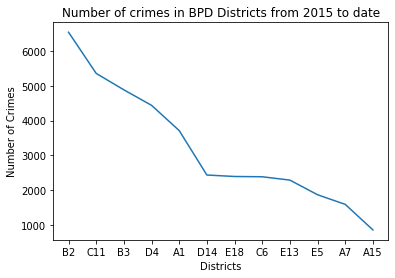

In [27]:
plt.plot(df_crime['DISTRICT'].value_counts())
plt.title('Number of crimes in BPD Districts from 2015 to date')
plt.xlabel('Districts')
plt.ylabel('Number of Crimes')

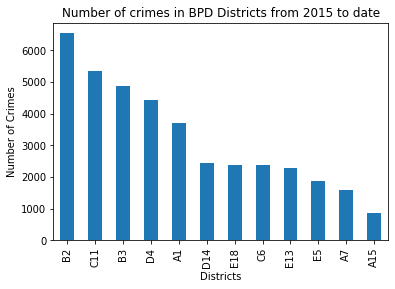

In [28]:
df_crime['DISTRICT'].value_counts().plot(kind='bar')
plt.title('Number of crimes in BPD Districts from 2015 to date')
plt.xlabel('Districts')
plt.ylabel('Number of Crimes')
plt.show()

In [29]:
df.loc[(df['BPD Districts'] == 'B-2') | (df['BPD Districts'] == 'C-11') | (df['BPD Districts'] == 'B-3')].sort_values(by=['BPD Districts'], ascending=True)

,Boston Neighborhoods,Latitude,Longitude,Zip Code,BPD Districts
15,Mission Hill,42.335780,-71.109810,"02120, 02115",B-2
18,Roxbury,42.330297,-71.089481,02119,B-2
13,Mattapan,42.278225,-71.096083,02126,B-3
7,Dorchester,42.351349,-71.052850,02121,C-11
14,Mid-Dorchester,42.351349,-71.052850,"02121, 02122, 02124, 02125",C-11


In [30]:
df.loc[(df['BPD Districts'] == 'A-15') | (df['BPD Districts'] == 'A-7') | (df['BPD Districts'] == 'E-5')].sort_values(by=['BPD Districts'], ascending=True)

,Boston Neighborhoods,Latitude,Longitude,Zip Code,BPD Districts
5,Charlestown,42.367770,-71.059017,02129,A-15
9,East Boston,42.351414,-71.056713,02128,A-7
17,Roslindale,42.281813,-71.137111,02131,E-5
22,West Roxbury,42.282193,-71.145995,02132,E-5


In [31]:
res1 = requests.get(
    'https://www.roadsnacks.net/worst-boston-neighborhoods/')

soup1 = BeautifulSoup(res1.text, 'html.parser')
table1 = soup1.find('table')

df_worst_neighborhoods = pd.read_html(str(table1))
df_worst_neighborhoods = df_worst_neighborhoods[0]
df_worst_neighborhoods

,Rank,Neighborhood,Population,Home Value,Median Income
0,1,Roxbury,63672,"$273,402","$34,616"
1,2,Mattapan,39010,"$237,849","$45,798"
2,3,North Dorchester,27791,"$343,331","$56,252"
3,4,East Boston,43436,"$276,989","$56,961"
4,5,Hyde Park,35116,"$324,484","$65,408"
5,6,Fenway-Kenmore,38280,"$241,970","$48,949"
6,7,South Dorchester,66765,"$352,652","$61,578"
7,8,Roslindale,36129,"$293,614","$80,867"
8,9,Jamaica Plain,45158,"$359,364","$75,652"
9,10,South Boston,38206,"$367,531","$86,753"


In [32]:
res2 = requests.get(
    'https://www.homesnacks.net/best-neighborhoods-in-boston-ma-128139/#methodology')

soup2 = BeautifulSoup(res2.text, 'html.parser')
table2 = soup2.find('table')

df_best_neighborhoods = pd.read_html(str(table2))
df_best_neighborhoods = df_best_neighborhoods[0]
df_best_neighborhoods

,Rank,Neighborhood,Population,Home Value,Median Income
0,1,Back Bay-Beacon Hill,28988,"$776,224","$93,684"
1,2,Charlestown,17208,"$426,124","$91,998"
2,3,West Roxbury,32855,"$407,058","$91,763"
3,4,Central,33579,"$595,762","$93,484"
4,5,South End,34304,"$558,804","$72,022"
5,6,Allston-Brighton,67713,"$306,048","$61,281"
6,7,South Boston,38206,"$367,531","$86,753"
7,8,Jamaica Plain,45158,"$359,364","$75,652"
8,9,Roslindale,36129,"$293,614","$80,867"
9,10,South Dorchester,66765,"$352,652","$61,578"


In [33]:
address = 'Boston, Massachusetts'

geolocator = Nominatim(user_agent="boston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinates of '+ address + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Boston, Massachusetts are 42.3602534, -71.0582912.


In [34]:
map_boston = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Boston Neighborhoods']):
    label = '{}'.format(neighborhood)
    folium.Marker([lat, lng], popup=label).add_to(map_boston) 
    
map_boston

In [35]:
CLIENT_ID = 'DLEPKVUPBD22IWQUTN2PAYMXRPPSSNG322V3KVLF35CLNV0F'
CLIENT_SECRET = 'MFVKOQGWMBP3IU35Y04EJECLOGISGUEQPFSKQZ2VE2JMBUSE'
VERSION = '20180605'

print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: DLEPKVUPBD22IWQUTN2PAYMXRPPSSNG322V3KVLF35CLNV0F
CLIENT_SECRET:MFVKOQGWMBP3IU35Y04EJECLOGISGUEQPFSKQZ2VE2JMBUSE


In [53]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):

    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame(
        [item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']

    return(nearby_venues)

In [54]:
boston_venues = getNearbyVenues(names=df['Boston Neighborhoods'],
                                  latitudes=df['Latitude'],
                                  longitudes=df['Longitude']
                                  )
boston_venues

Allston
Back Bay
Bay Village
Beacon Hill
Brighton
Charlestown
Chinatown-Leather District
Dorchester
Downtown
East Boston
Fenway-Kenmore
Hyde Park
Jamaica Plain
Mattapan
Mid-Dorchester
Mission Hill
North End
Roslindale
Roxbury
South Boston
South End
West End
West Roxbury


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allston,42.350466,-71.111004,Boston House of Pizza,42.350281,-71.113864,Pizza Place
1,Allston,42.350466,-71.111004,OTTO,42.350388,-71.115236,Pizza Place
2,Allston,42.350466,-71.111004,Amazon@Boston,42.350761,-71.114298,Shipping Store
3,Allston,42.350466,-71.111004,Pavement Coffeehouse,42.350030,-71.107020,Café
4,Allston,42.350466,-71.111004,Nud Pob Thai Cuisine,42.349996,-71.107152,Thai Restaurant
...,...,...,...,...,...,...,...
1360,West End,42.363940,-71.067390,Dunkin',42.360777,-71.070267,Donut Shop
1361,West Roxbury,42.282193,-71.145995,MJ Sub & Pizza,42.285940,-71.145071,Pizza Place
1362,West Roxbury,42.282193,-71.145995,Stash's Pizza,42.286044,-71.145208,Pizza Place
1363,West Roxbury,42.282193,-71.145995,Boston Paws,42.286120,-71.145160,Pet Store


In [55]:
boston_venues['Neighborhood'].value_counts()

Downtown                      100
Mid-Dorchester                100
East Boston                   100
Dorchester                    100
Chinatown-Leather District    100
South Boston                  100
Back Bay                      100
West End                       92
North End                      88
South End                      77
Bay Village                    74
Fenway-Kenmore                 66
Charlestown                    58
Beacon Hill                    48
Mission Hill                   44
Brighton                       30
Allston                        29
Jamaica Plain                  19
Hyde Park                      14
Roxbury                        11
Roslindale                      6
Mattapan                        5
West Roxbury                    4
Name: Neighborhood, dtype: int64

In [56]:
len(boston_venues['Venue Category'].unique())

207

In [57]:
boston_onehot = pd.get_dummies(
    boston_venues[['Venue Category']], prefix="", prefix_sep="")
boston_onehot['Neighborhood'] = boston_venues['Neighborhood']

fixed_columns = [boston_onehot.columns[-1]] + \
    list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]

boston_onehot.head(11)

,Zoo Exhibit,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
boston_grouped = boston_onehot.groupby('Neighborhood').mean().reset_index()
boston_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Allston,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.00,0.034483,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Back Bay,0.00000,0.020000,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.010000,0.00,0.00,0.000000,0.000000,0.020000,0.010000,0.010000,0.02,0.020000
2,Bay Village,0.00000,0.000000,0.000000,0.067568,0.000000,0.013514,0.00,0.013514,0.013514,...,0.000000,0.00,0.00,0.013514,0.000000,0.000000,0.013514,0.013514,0.00,0.013514
3,Beacon Hill,0.00000,0.000000,0.000000,0.041667,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Brighton,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.033333,...,0.000000,0.00,0.00,0.000000,0.000000,0.033333,0.000000,0.000000,0.00,0.066667
5,Charlestown,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Chinatown-Leather District,0.00000,0.000000,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.060000,...,0.000000,0.00,0.00,0.020000,0.000000,0.010000,0.020000,0.000000,0.00,0.010000
7,Dorchester,0.00000,0.000000,0.000000,0.030000,0.000000,0.010000,0.01,0.000000,0.020000,...,0.000000,0.00,0.00,0.010000,0.010000,0.000000,0.020000,0.000000,0.00,0.000000
8,Downtown,0.00000,0.000000,0.000000,0.030000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.000000
9,East Boston,0.00000,0.000000,0.000000,0.040000,0.000000,0.000000,0.01,0.000000,0.040000,...,0.000000,0.00,0.00,0.020000,0.000000,0.010000,0.020000,0.000000,0.00,0.010000


In [59]:
num_top_venues = 5
for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood']
                            == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(
        drop=True).head(num_top_venues))
    print('\n')

----Allston----
                venue  freq
0                Café  0.07
1  Chinese Restaurant  0.07
2         Coffee Shop  0.07
3         Pizza Place  0.07
4            Pharmacy  0.07


----Back Bay----
                venue  freq
0      Clothing Store  0.08
1         Coffee Shop  0.05
2  Italian Restaurant  0.04
3           Bookstore  0.03
4      Ice Cream Shop  0.03


----Bay Village----
                 venue  freq
0              Theater  0.08
1  American Restaurant  0.07
2                Hotel  0.05
3       Sandwich Place  0.05
4   Seafood Restaurant  0.05


----Beacon Hill----
                venue  freq
0  Italian Restaurant  0.06
1           Hotel Bar  0.06
2         Pizza Place  0.06
3   French Restaurant  0.04
4        Gourmet Shop  0.04


----Brighton----
                venue  freq
0         Pizza Place  0.10
1         Yoga Studio  0.07
2         Coffee Shop  0.07
3           Rock Club  0.03
4  Chinese Restaurant  0.03


----Charlestown----
                venue  freq
0     

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [62]:
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(
        boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Chinese Restaurant,Pharmacy,Café,Pizza Place,Coffee Shop,Mexican Restaurant,College Rec Center,Vegetarian / Vegan Restaurant,Big Box Store,Music Venue
1,Back Bay,Clothing Store,Coffee Shop,Italian Restaurant,Bar,Hotel,Ice Cream Shop,Bookstore,Yoga Studio,Burger Joint,Sandwich Place
2,Bay Village,Theater,American Restaurant,Sandwich Place,Seafood Restaurant,Hotel,Performing Arts Venue,Steakhouse,Spa,Italian Restaurant,Bakery
3,Beacon Hill,Hotel Bar,Pizza Place,Italian Restaurant,Restaurant,Playground,French Restaurant,Gourmet Shop,American Restaurant,Park,Dessert Shop
4,Brighton,Pizza Place,Coffee Shop,Yoga Studio,Bakery,Thai Restaurant,Food & Drink Shop,Food Court,Chinese Restaurant,Record Shop,Rental Car Location
5,Charlestown,Park,Pizza Place,Bar,Italian Restaurant,Sports Bar,Hotel,Donut Shop,Brewery,Gastropub,Bakery
6,Chinatown-Leather District,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sandwich Place,Sushi Restaurant,Theater,Italian Restaurant,Spa,Gym / Fitness Center
7,Dorchester,Coffee Shop,Italian Restaurant,Sandwich Place,Bakery,French Restaurant,American Restaurant,Hotel,Café,Museum,Mexican Restaurant
8,Downtown,Coffee Shop,Seafood Restaurant,Historic Site,Sandwich Place,Park,Salad Place,Italian Restaurant,New American Restaurant,Hotel,American Restaurant
9,East Boston,Chinese Restaurant,Bakery,Sandwich Place,Coffee Shop,American Restaurant,Asian Restaurant,Sushi Restaurant,Dim Sum Restaurant,Dessert Shop,Deli / Bodega


In [66]:
kclusters = 6
boston_grouped_clustering = boston_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=0).fit(
    boston_grouped_clustering)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 4, 0, 0, 0,
       5])

In [67]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
boston_merged = df

boston_merged = boston_merged.join(
    neighborhoods_venues_sorted.set_index('Neighborhood'), on='Boston Neighborhoods')

boston_merged.head(11)

,Boston Neighborhoods,Latitude,Longitude,Zip Code,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,42.350466,-71.111004,02134,D-14,0,Chinese Restaurant,Pharmacy,Café,Pizza Place,Coffee Shop,Mexican Restaurant,College Rec Center,Vegetarian / Vegan Restaurant,Big Box Store,Music Venue
1,Back Bay,42.349990,-71.087650,02116,D-4,0,Clothing Store,Coffee Shop,Italian Restaurant,Bar,Hotel,Ice Cream Shop,Bookstore,Yoga Studio,Burger Joint,Sandwich Place
2,Bay Village,42.348168,-71.068471,02116,A-1,0,Theater,American Restaurant,Sandwich Place,Seafood Restaurant,Hotel,Performing Arts Venue,Steakhouse,Spa,Italian Restaurant,Bakery
3,Beacon Hill,42.358420,-71.068600,02108,A-1,0,Hotel Bar,Pizza Place,Italian Restaurant,Restaurant,Playground,French Restaurant,Gourmet Shop,American Restaurant,Park,Dessert Shop
4,Brighton,42.352131,-71.124924,02135,D-14,0,Pizza Place,Coffee Shop,Yoga Studio,Bakery,Thai Restaurant,Food & Drink Shop,Food Court,Chinese Restaurant,Record Shop,Rental Car Location
5,Charlestown,42.367770,-71.059017,02129,A-15,0,Park,Pizza Place,Bar,Italian Restaurant,Sports Bar,Hotel,Donut Shop,Brewery,Gastropub,Bakery
6,Chinatown-Leather District,42.352510,-71.060900,02111,A-1,0,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sandwich Place,Sushi Restaurant,Theater,Italian Restaurant,Spa,Gym / Fitness Center
7,Dorchester,42.351349,-71.052850,02121,C-11,0,Coffee Shop,Italian Restaurant,Sandwich Place,Bakery,French Restaurant,American Restaurant,Hotel,Café,Museum,Mexican Restaurant
8,Downtown,42.358290,-71.056630,02201,A-1,0,Coffee Shop,Seafood Restaurant,Historic Site,Sandwich Place,Park,Salad Place,Italian Restaurant,New American Restaurant,Hotel,American Restaurant
9,East Boston,42.351414,-71.056713,02128,A-7,0,Chinese Restaurant,Bakery,Sandwich Place,Coffee Shop,American Restaurant,Asian Restaurant,Sushi Restaurant,Dim Sum Restaurant,Dessert Shop,Deli / Bodega


In [86]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Boston Neighborhoods'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' +
                         str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [87]:
boston_merged.loc[boston_merged['Cluster Labels'] == 0,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,D-14,0,Chinese Restaurant,Pharmacy,Café,Pizza Place,Coffee Shop,Mexican Restaurant,College Rec Center,Vegetarian / Vegan Restaurant,Big Box Store,Music Venue
1,Back Bay,D-4,0,Clothing Store,Coffee Shop,Italian Restaurant,Bar,Hotel,Ice Cream Shop,Bookstore,Yoga Studio,Burger Joint,Sandwich Place
2,Bay Village,A-1,0,Theater,American Restaurant,Sandwich Place,Seafood Restaurant,Hotel,Performing Arts Venue,Steakhouse,Spa,Italian Restaurant,Bakery
3,Beacon Hill,A-1,0,Hotel Bar,Pizza Place,Italian Restaurant,Restaurant,Playground,French Restaurant,Gourmet Shop,American Restaurant,Park,Dessert Shop
4,Brighton,D-14,0,Pizza Place,Coffee Shop,Yoga Studio,Bakery,Thai Restaurant,Food & Drink Shop,Food Court,Chinese Restaurant,Record Shop,Rental Car Location
5,Charlestown,A-15,0,Park,Pizza Place,Bar,Italian Restaurant,Sports Bar,Hotel,Donut Shop,Brewery,Gastropub,Bakery
6,Chinatown-Leather District,A-1,0,Chinese Restaurant,Bakery,Asian Restaurant,Coffee Shop,Sandwich Place,Sushi Restaurant,Theater,Italian Restaurant,Spa,Gym / Fitness Center
7,Dorchester,C-11,0,Coffee Shop,Italian Restaurant,Sandwich Place,Bakery,French Restaurant,American Restaurant,Hotel,Café,Museum,Mexican Restaurant
8,Downtown,A-1,0,Coffee Shop,Seafood Restaurant,Historic Site,Sandwich Place,Park,Salad Place,Italian Restaurant,New American Restaurant,Hotel,American Restaurant
9,East Boston,A-7,0,Chinese Restaurant,Bakery,Sandwich Place,Coffee Shop,American Restaurant,Asian Restaurant,Sushi Restaurant,Dim Sum Restaurant,Dessert Shop,Deli / Bodega


In [88]:
boston_merged.loc[boston_merged['Cluster Labels'] == 1,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Roslindale,E-5,1,Bar,Pet Store,Park,Italian Restaurant,Chinese Restaurant,Latin American Restaurant,Yoga Studio,Farmers Market,Falafel Restaurant,Event Space


In [89]:
boston_merged.loc[boston_merged['Cluster Labels'] == 2,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Mattapan,B-3,2,Pizza Place,Ice Cream Shop,Moving Target,Event Service,Park,Yoga Studio,Dive Bar,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [90]:
boston_merged.loc[boston_merged['Cluster Labels'] == 3,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,North End,A-1,3,Italian Restaurant,Pizza Place,Park,Seafood Restaurant,Bakery,Café,Harbor / Marina,Coffee Shop,Sandwich Place,Grocery Store


In [91]:
boston_merged.loc[boston_merged['Cluster Labels'] == 4,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Roxbury,B-2,4,Donut Shop,Pizza Place,Track,Pharmacy,Café,Diner,BBQ Joint,Soccer Field,American Restaurant,African Restaurant


In [92]:
boston_merged.loc[boston_merged['Cluster Labels'] == 5,
                     boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Boston Neighborhoods,BPD Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,West Roxbury,E-5,5,Pizza Place,Pet Store,Train Station,Yoga Studio,Discount Store,Falafel Restaurant,Event Space,Event Service,Ethiopian Restaurant,Electronics Store
